In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('/content/retail_sales_dataset.csv')
print(data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [3]:
print(data.tail(10))

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
990             991  2023-12-26     CUST991  Female   34         Clothing   
991             992  2023-08-21     CUST992  Female   57      Electronics   
992             993  2023-02-06     CUST993  Female   48      Electronics   
993             994  2023-12-18     CUST994  Female   51           Beauty   
994             995  2023-04-30     CUST995  Female   41         Clothing   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
990         2              50           100  
991         2              30            60  
992         3 

In [4]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


from matplotlib import pyplot as plt
_df_0['Transaction ID'].plot(kind='hist', bins=20, title='Transaction ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Price per Unit'].plot(kind='hist', bins=20, title='Price per Unit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Transaction ID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Age', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Quantity', y='Price per Unit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Price per Unit', y='Total Amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Transaction ID'].plot(kind='line', figsize=(8, 4), title='Transaction ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Price per Unit'].plot(kind='line', figsize=(8, 4), title='Price per Unit')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

# Prepare data for Prophet: rename columns to 'ds' and 'y'
sales_data = data[['Date', 'Total Amount']].copy()
sales_data.rename(columns={'Date': 'ds', 'Total Amount': 'y'}, inplace=True)

print(sales_data.head())

            ds     y
521 2023-01-01  1500
179 2023-01-01   900
558 2023-01-01  1200
302 2023-01-02    90
978 2023-01-02    25


In [17]:
!pip install prophet cmdstanpy

In [16]:
df_prophet = sales_data.rename(columns={'Date': 'ds', 'sales': 'y'})
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
model.fit(df_prophet)
future = model.make_future_dataframe(periods=30) # future 30 days
forecast = model.predict(future)


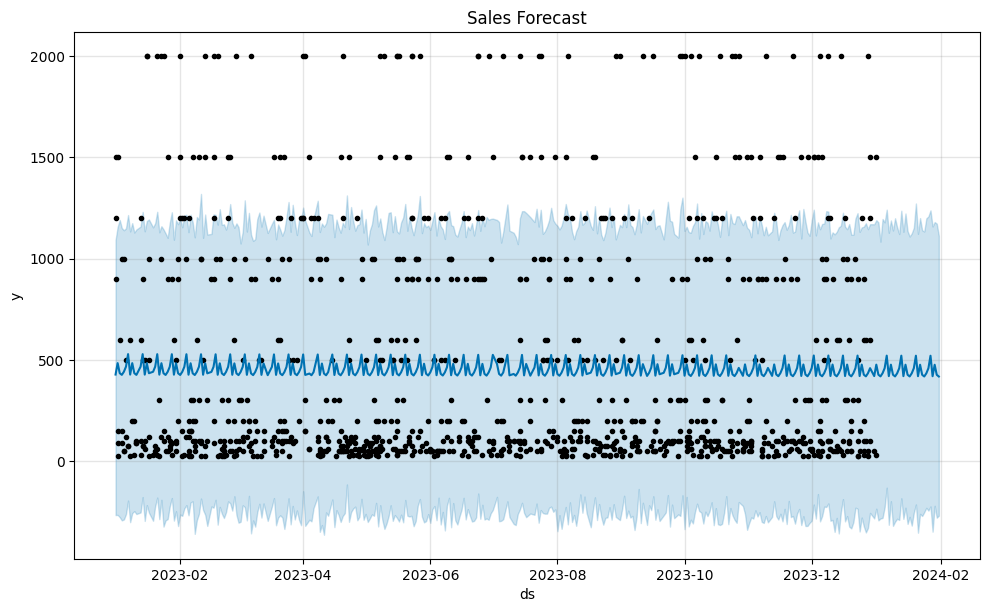

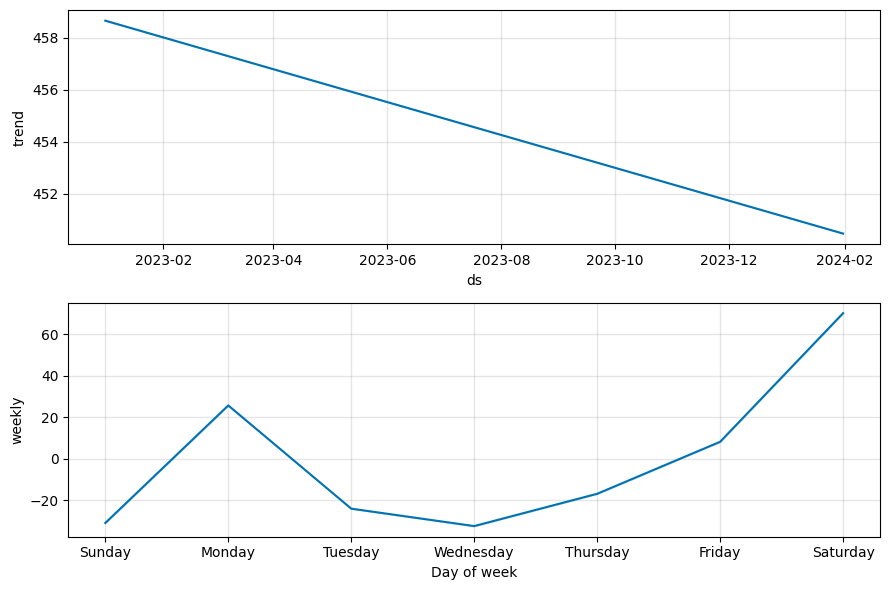

In [9]:
model.plot(forecast)
plt.title('Sales Forecast')
plt.show()

model.plot_components(forecast)
plt.show()

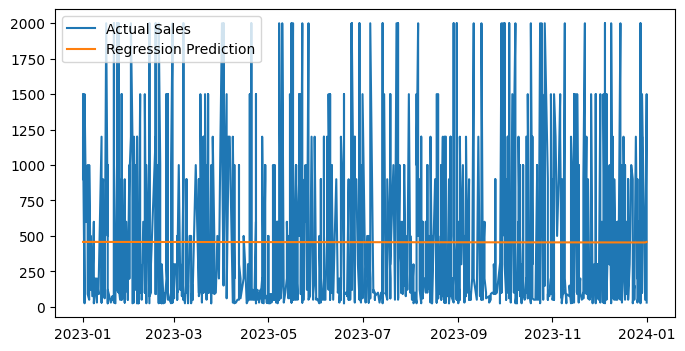

In [11]:
sales_data['day_of_year'] = sales_data['ds'].dt.dayofyear
X = sales_data[['day_of_year']]
y = sales_data['y']
reg = LinearRegression()
reg.fit(X, y)
sales_data['pred'] = reg.predict(X)

plt.figure(figsize=(8,4))
plt.plot(sales_data['ds'], sales_data['y'], label='Actual Sales')
plt.plot(sales_data['ds'], sales_data['pred'], label='Regression Prediction')
plt.legend()
plt.show()

In [12]:
mse = mean_squared_error(y, sales_data['pred'])
print('Mean Squared Error:', mse)

Mean Squared Error: 313282.5446933831


In [14]:
import os

# Create the directory if it doesn't exist
output_dir = '../data'
os.makedirs(output_dir, exist_ok=True)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(os.path.join(output_dir, 'forecast_results.csv'), index=False)